In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv("amazon_review_ID.shuf.lrn.csv")

print(df_train.shape)

(750, 10002)


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [4]:
X = df_train.iloc[:, 1:10001].values
y = df_train.iloc[:,-1:].values

from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(y.ravel())
y_enc = enc.transform(y.ravel())

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_enc, test_size=0.1, random_state=0)


In [6]:
#from sklearn.preprocessing import StandardScaler

#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

In [7]:
#from sklearn.decomposition import PCA

#pca = PCA()
#X_train = pca.fit_transform(X_train)
#X_test = pca.transform(X_test)

In [8]:
classifier = RandomForestClassifier(n_estimators=400, random_state=0)
classifier.fit(X_train, y_train.ravel())
y_pred = classifier.predict(X_test)



accuracy_training_set = classifier.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = classifier.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.56


In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 2]]
              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       0.00      0.00      0.00         2
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       1.00      0.25      0.40         4
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.50      1.00      0.67         1
          11       1.00      1.00      1.00         1
          12       1.00      0.50      0.67         2
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.50      0.50      0.50         2
          16   

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
df_test = pd.read_csv("amazon_review_ID.shuf.tes.csv")
df_result = pd.read_csv("amazon_review_ID.shuf.tes.csv", usecols=['ID'])

In [11]:
X_result = df_test.iloc[:, 1:10001].values
y_result = classifier.predict(X_result)

result_enc = enc.inverse_transform(y_result)
df_result["Class"] = pd.Series(result_enc, index=df_result.index)
df_result.to_csv("result.csv", index=False)

In [12]:
df_result

,ID,Class
0,750,Power
1,751,Corn
2,752,Comdet
3,753,Johnson
4,754,Cholette
...,...,...
745,1495,Shea
746,1496,Chandler
747,1497,Power
748,1498,Grove


In [ ]:
print('hey')

## Logistic Regression

In [ ]:
#normalizing the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:


from sklearn.linear_model import LogisticRegression
#creating the model
model = LogisticRegression(random_state=42, solver='newton-cg', warm_start=True, class_weight='balanced', intercept_scaling= 10, max_iter=100)
#model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio = 0.5, max_iter=200)
#fitting data to the model
model.fit(X_train, y_train)



#calculating the probabilities
y_pred_proba = model.predict_proba(X_test)



#printing the accuarcy

accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.6133333333333333


# SGD Classifier

In [66]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), SGDClassifier(loss='hinge', penalty='l2',max_iter=1000, tol=1e-3))
model.fit(X_train, y_train)



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier())])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


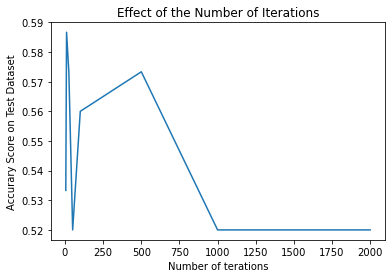

In [75]:
#trying to find the right number of iterations

import matplotlib.pyplot as plt

interations = [5, 10, 25, 50, 100, 500, 1000, 2000]
scores = []
for interation in interations:
    model = SGDClassifier(loss="log", penalty="l2", max_iter=interation)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
  
plt.title("Effect of the Number of Iterations")
plt.xlabel("Number of terations")
plt.ylabel("Accurary Score on Test Dataset")
plt.plot(interations, scores) 


In [67]:
#calculating the probabilities
y_pred_proba = model.decision_function(X_test)

#printing the accuarcy
accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.49333333333333335


## Random Forest

In [23]:
#normalizing the features

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
#importing the necessary libraries
from sklearn.ensemble import RandomForestClassifier

#creating the model
model = RandomForestClassifier(min_samples_split=4, min_samples_leaf=3, min_weight_fraction_leaf = 0.000000000000000001, bootstrap=True, n_estimators=7000)
#fitting data to the model
model.fit(X_train, y_train)

#calculating the probabilities
y_pred_proba = model.predict_proba(X_test)


#printing the accuarcy
accuracy_training_set = model.score(X_train, y_train)
print(accuracy_training_set)

accuracy_testing_set = model.score(X_test, y_test)
print(accuracy_testing_set)

1.0
0.6


In [41]:
#loading the test data
df_test = pd.read_csv("amazon_review_ID.shuf.tes.csv")
df_result = pd.read_csv("amazon_review_ID.shuf.tes.csv", usecols=['ID'])


#making a prediction for the test data
X_result = df_test.iloc[:, 1:10001].values
X_result = sc.transform(X_result)

y_result = model.predict(X_result)

#storing the results
result_enc = enc.inverse_transform(y_result)
df_result["Class"] = pd.Series(result_enc, index=df_result.index)
df_result.to_csv("result.csv", index=False)

In [42]:
df_result

,ID,Class
0,750,Power
1,751,Messick
2,752,Chandler
3,753,Chandler
4,754,Messick
...,...,...
745,1495,Shea
746,1496,Chandler
747,1497,Power
748,1498,Chandler


# Keras RNN

In [377]:
#see how many classes (persons) we have

len(df_train['Class'].unique())

50

In [354]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import RMSprop
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, SimpleRNN

In [355]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [356]:

model = Sequential()

model.add(Dense(30, input_dim=10000, activation='tanh'))
model.add(Dense(20, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))


#model.add(Dense(50, input_dim=10000, activation='softmax', name='FC1', input_shape=(10000,)))
#model.add(Activation('relu'))
#model.add(Dense(50,name='out_layer'))
#model.add(Activation('sigmoid'))
#model.add(Dropout(0.5))


In [357]:
model.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=10, verbose=1)

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#model.fit(X_train, y_train, epochs=100, verbose=1)


model.fit(X_train,y_train.ravel(),batch_size=50,epochs=100, validation_split=0.1)

Epoch 1/100
13/13 [==============================] - 1s 14ms/step - loss: 7.2963 - accuracy: 0.0241 - val_loss: 12.3410 - val_accuracy: 0.0147
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: -17.5717 - accuracy: 0.0192 - val_loss: 14.3527 - val_accuracy: 0.0294
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: -26.8219 - accuracy: 0.0243 - val_loss: 20.4577 - val_accuracy: 0.0294
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: -38.9514 - accuracy: 0.0170 - val_loss: 27.4828 - val_accuracy: 0.0294
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: -46.0932 - accuracy: 0.0225 - val_loss: 34.4271 - val_accuracy: 0.0294
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: -54.1333 - accuracy: 0.0173 - val_loss: 41.5074 - val_accuracy: 0.0294
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: -63.8602 - accuracy: 0.0234 - val_loss: 49.4201 - val_accuracy: 

Epoch 57/100
13/13 [==============================] - 0s 5ms/step - loss: -531.1629 - accuracy: 0.0416 - val_loss: 421.2285 - val_accuracy: 0.0294
Epoch 58/100
13/13 [==============================] - 0s 5ms/step - loss: -557.6689 - accuracy: 0.0323 - val_loss: 427.3514 - val_accuracy: 0.0294
Epoch 59/100
13/13 [==============================] - 0s 5ms/step - loss: -556.8923 - accuracy: 0.0306 - val_loss: 432.9836 - val_accuracy: 0.0294
Epoch 60/100
13/13 [==============================] - 0s 5ms/step - loss: -558.8313 - accuracy: 0.0439 - val_loss: 438.5273 - val_accuracy: 0.0294
Epoch 61/100
13/13 [==============================] - 0s 5ms/step - loss: -558.0595 - accuracy: 0.0378 - val_loss: 444.4057 - val_accuracy: 0.0294
Epoch 62/100
13/13 [==============================] - 0s 4ms/step - loss: -594.7969 - accuracy: 0.0325 - val_loss: 450.2054 - val_accuracy: 0.0294
Epoch 63/100
13/13 [==============================] - 0s 5ms/step - loss: -590.8483 - accuracy: 0.0322 - val_loss: 455